<a href="https://colab.research.google.com/github/anandasofficial/anandasofficial/blob/main/FinalCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

import itertools

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [22]:
df = pd.read_csv('segmentation data.csv')
df.head(1000)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
995,100000996,1,1,31,1,78489,0,0
996,100000997,0,1,40,1,161999,2,1
997,100000998,0,0,38,1,98032,1,2
998,100000999,0,0,23,0,96060,1,0


In [23]:
df.shape

(2000, 8)

In [24]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [25]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


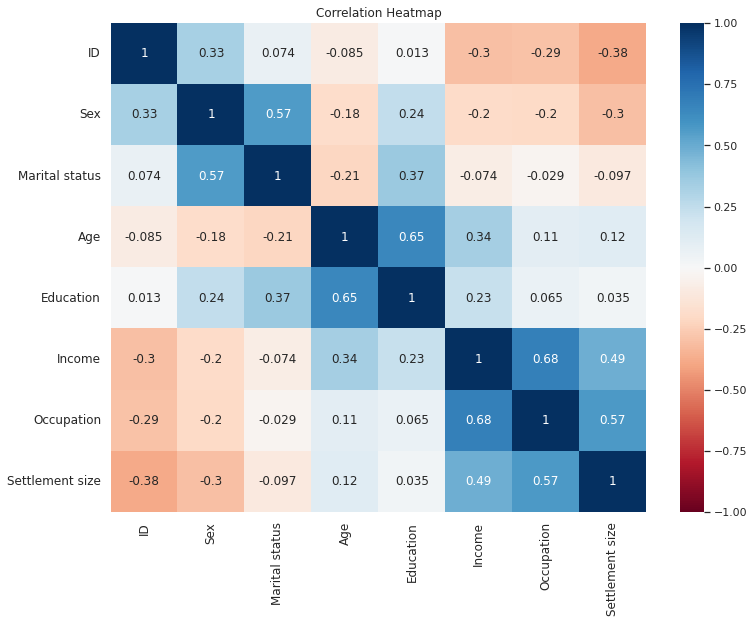

In [26]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

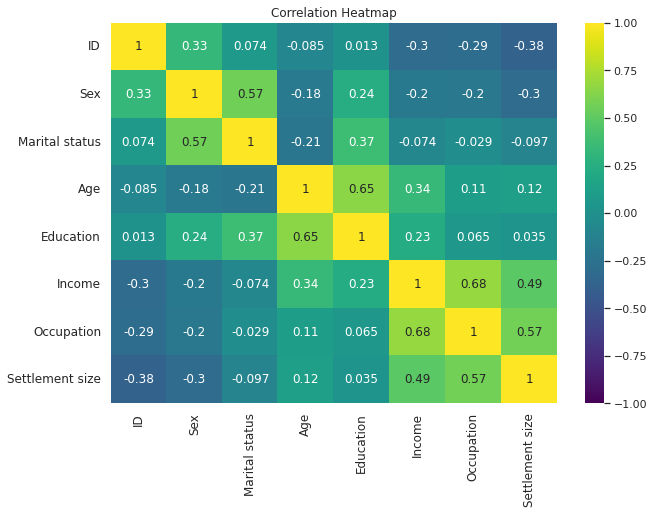

In [27]:
plt.figure(figsize = (10, 7))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'viridis',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

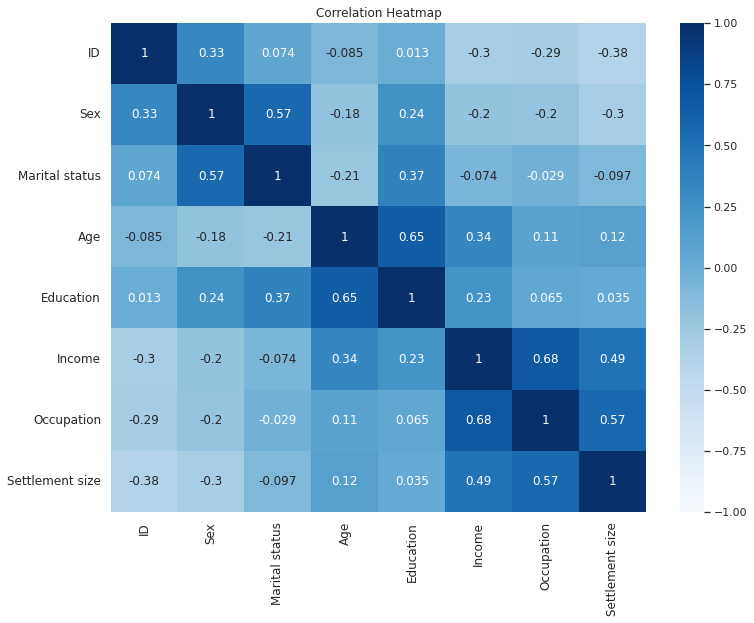

In [28]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'Blues',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

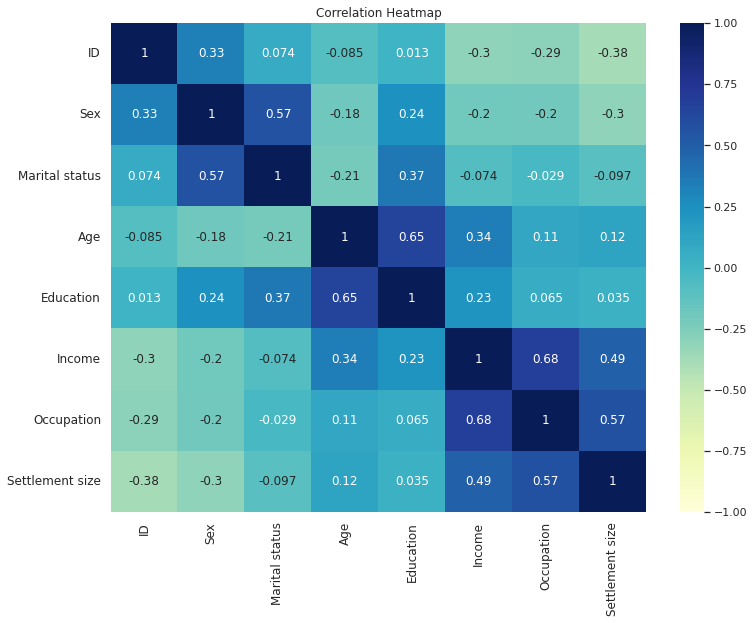

In [29]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'YlGnBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
scaler = StandardScaler()
Customer_Segmentation_std = scaler.fit_transform(df)

In [31]:
hier_clust = linkage(Customer_Segmentation_std, method = 'ward')

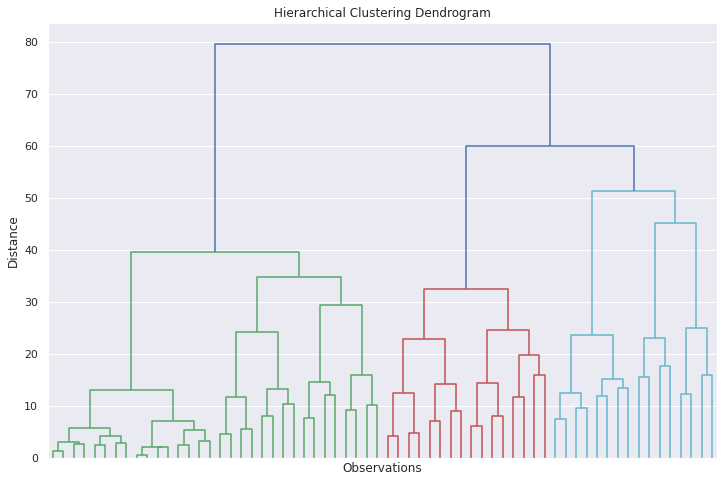

In [32]:
plt.figure(figsize = (12,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

In [33]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Customer_Segmentation_std)
    wcss.append(kmeans.inertia_)

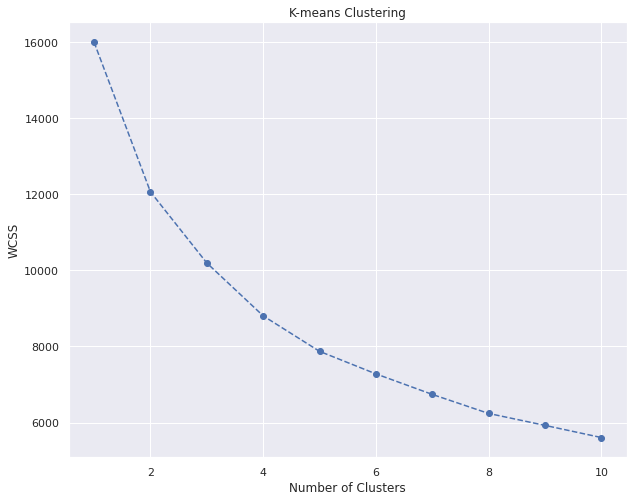

In [34]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [36]:
kmeans.fit(Customer_Segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [37]:


df_Customer_Segm_kmeans = df.copy()
df_Customer_Segm_kmeans['Segment K-means'] = kmeans.labels_


In [38]:
df_Customer_Segm_analysis = df_Customer_Segm_kmeans.groupby(['Segment K-means']).mean()
df_Customer_Segm_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,,
0,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262
1,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658
2,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666
3,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481


In [39]:
df_Customer_Segm_analysis['Num of Obs'] = df_Customer_Segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_Customer_Segm_analysis['Prop of Obs'] = df_Customer_Segm_analysis['Num of Obs'] / df_Customer_Segm_analysis['Num of Obs'].sum()

In [40]:
df_Customer_Segm_analysis.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num of Obs,Prop of Obs
Segment K-means,,,,,,,,,,
0,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262,679,0.3395
1,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658,632,0.3160
2,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666,419,0.2095
3,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481,270,0.1350


In [41]:
df_Customer_Segm_analysis.rename({0:'better-off',
                         1:'fewer-opportunities',
                         2:'standard Living',
                         3:'career oriented'})

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num of Obs,Prop of Obs
Segment K-means,,,,,,,,,,
better-off,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262,679,0.3395
fewer-opportunities,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658,632,0.3160
standard Living,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666,419,0.2095
career oriented,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481,270,0.1350


In [42]:
df_Customer_Segm_kmeans['Labels'] = df_Customer_Segm_kmeans['Segment K-means'].map({0:'better-off', 
                                                                  1:'fewer-opportunities',
                                                                  2:'standard Living', 
                                                                  3:'career oriented'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


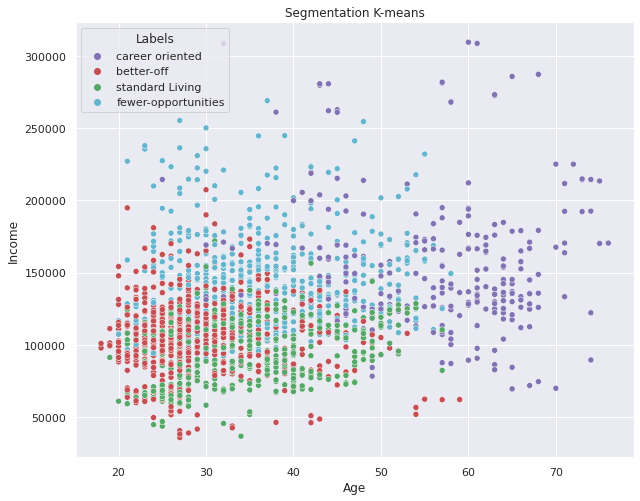

In [43]:
x = df_Customer_Segm_kmeans['Age']
y = df_Customer_Segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x, y, hue = df_Customer_Segm_kmeans['Labels'], palette = ['m', 'r', 'g', 'c'])
plt.title('Segmentation K-means')
plt.show()

In [44]:
pca = PCA()

In [45]:
pca.fit(Customer_Segmentation_std)

PCA()

In [46]:
pca.explained_variance_ratio_

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

In [47]:
pca = PCA(n_components = 3)

In [48]:
pca.fit(Customer_Segmentation_std)

PCA(n_components=3)

In [49]:
pca.components_

array([[-0.34541048, -0.32858553, -0.18726934,  0.27028302,  0.10451468,
         0.48384405,  0.46168136,  0.45433728],
       [ 0.10723681,  0.4213196 ,  0.47208337,  0.35525956,  0.65278586,
         0.17628427,  0.06136181, -0.0307768 ],
       [ 0.14352194, -0.31795888, -0.4854334 ,  0.61344196,  0.25225754,
        -0.12360121, -0.34456626, -0.26212582]])

In [50]:
df_Pca_Comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_Pca_Comp

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.345410,-0.328586,-0.187269,0.270283,0.104515,0.483844,0.461681,0.454337
Component 2,0.107237,0.421320,0.472083,0.355260,0.652786,0.176284,0.061362,-0.030777
Component 3,0.143522,-0.317959,-0.485433,0.613442,0.252258,-0.123601,-0.344566,-0.262126


([<matplotlib.axis.YTick at 0x7f6909d00250>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

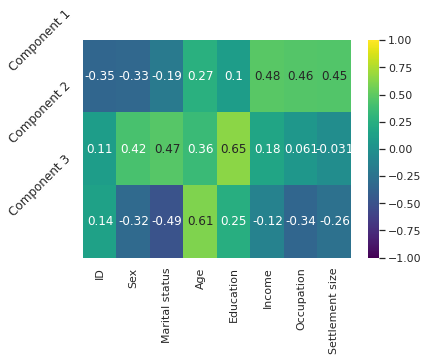

In [51]:
sns.heatmap(df_Pca_Comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'viridis',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)

In [52]:
pca.transform(Customer_Segmentation_std)

array([[ 2.85978214,  0.93667597,  2.03658632],
       [ 0.94413038,  0.39449213, -2.43378502],
       [-0.02303213, -0.8817974 ,  1.97408269],
       ...,
       [-1.84179778, -2.15868138,  1.1160118 ],
       [-2.71683211,  0.56139001, -0.4762533 ],
       [-2.2097949 , -2.42344957,  0.86070907]])

In [53]:
Scores_Pca = pca.transform(Customer_Segmentation_std)

In [54]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(Scores_Pca )
    wcss.append(kmeans_pca.inertia_)

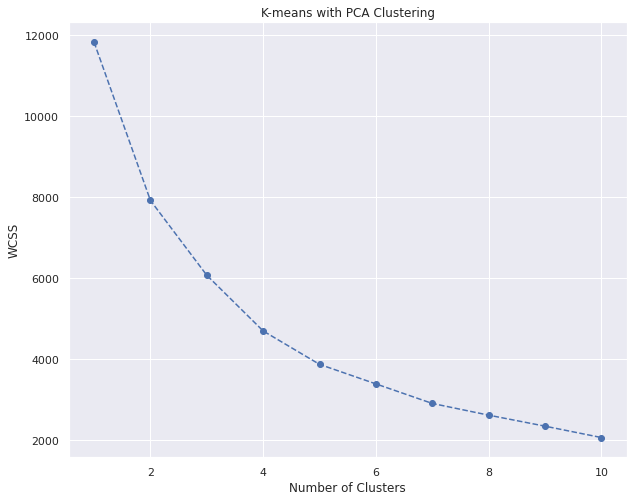

In [55]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [56]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [57]:
kmeans_pca.fit(Scores_Pca)

KMeans(n_clusters=4, random_state=42)

In [58]:
df_Segm_Pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(Scores_Pca)], axis = 1)
df_Segm_Pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column added contains the pca k-means clustering labels.
df_Segm_Pca_kmeans['Segmented K-means PCA'] = kmeans_pca.labels_

In [59]:
df_Segm_Pca_kmeans


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segmented K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,1
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,2
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,3
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,2
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1.615196,3
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,-0.923547,0
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,1.116012,3
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,-0.476253,0


In [60]:
df_Segm_Pca_kmeans_freq = df_Segm_Pca_kmeans.groupby(['Segmented K-means PCA']).mean()
df_Segm_Pca_kmeans_freq

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segmented K-means PCA,,,,,,,,,,,
0,1.000012e+08,0.919040,0.967016,28.958021,1.064468,106617.467766,0.659670,0.427286,-1.205155,0.616021,-0.833262
1,1.000009e+08,0.492537,0.679104,55.873134,2.130597,156430.727612,1.097015,1.082090,1.483593,2.152720,0.893411
2,1.000007e+08,0.036278,0.194006,35.466877,0.739748,140435.219243,1.255521,1.394322,1.471999,-0.935925,-0.187509
3,1.000013e+08,0.338747,0.099768,34.902552,0.756381,92426.039443,0.211137,0.044084,-1.222765,-0.915172,1.009819


In [67]:
df_Segm_Pca_kmeans_freq['Num of Obs'] = df_Segm_Pca_kmeans[['Segmented K-means PCA','Sex']].groupby(['Segmented K-means PCA']).count()
df_Segm_Pca_kmeans_freq['Prop of Obs'] = df_Segm_Pca_kmeans_freq['Num of Obs'] / df_Segm_Pca_kmeans_freq['Num of Obs'].sum()
df_Segm_Pca_kmeans_freq = df_Segm_Pca_kmeans_freq.rename({0:'Better Off', 
                                                          1:'Fewer Opportunities',
                                                          2:'Standard Living', 
                                                          3:'career Focused'})
df_Segm_Pca_kmeans_freq

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Num of Obs,Prop of Obs
Segmented K-means PCA,,,,,,,,,,,,,
standard living,1.000012e+08,0.919040,0.967016,28.958021,1.064468,106617.467766,0.659670,0.427286,-1.205155,0.616021,-0.833262,NaN,NaN
career oriented,1.000009e+08,0.492537,0.679104,55.873134,2.130597,156430.727612,1.097015,1.082090,1.483593,2.152720,0.893411,NaN,NaN
fewer opportunities,1.000007e+08,0.036278,0.194006,35.466877,0.739748,140435.219243,1.255521,1.394322,1.471999,-0.935925,-0.187509,NaN,NaN
better-off,1.000013e+08,0.338747,0.099768,34.902552,0.756381,92426.039443,0.211137,0.044084,-1.222765,-0.915172,1.009819,NaN,NaN


In [62]:


df_Segm_Pca_kmeans['Legend'] = df_Segm_Pca_kmeans['Segmented K-means PCA'].map({0:'standard living', 
                                                          1:'career oriented',
                                                          2:'fewer opportunities', 
                                                          3:'better-off'})



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


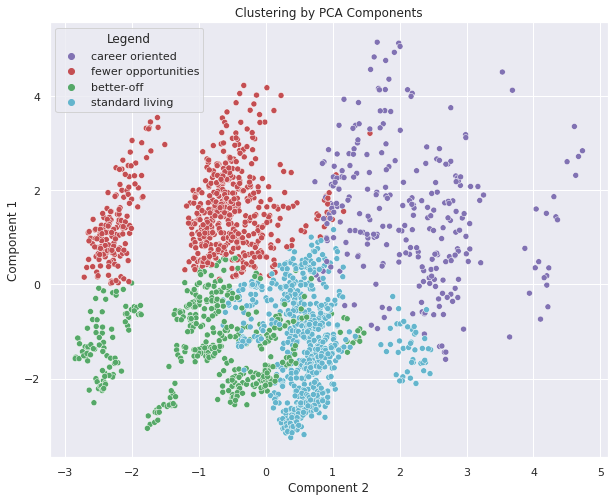

In [63]:
x_axis = df_Segm_Pca_kmeans['Component 2']
y_axis = df_Segm_Pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_Segm_Pca_kmeans['Legend'], palette = ['m', 'r', 'g', 'c'])
plt.title('Clustering by PCA Components')
plt.show()